c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.539594474040319
0.7099689643848824


c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


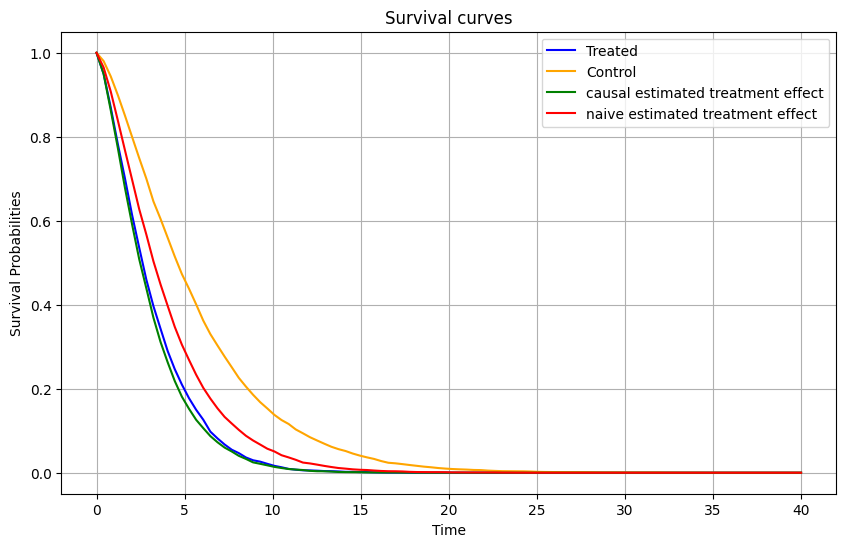

In [ ]:
import numpy as np
from scipy.special import expit
from Causal_KaplanMeier import Kaplan_Meier_Estimator
import matplotlib.pyplot as plt

n_samples = 10000
treatment_effect = 0.5
np.random.seed(1)
X1 = np.random.normal(0.5, 0.1, n_samples)
X2 = 5 * X1 + np.random.normal(0, 0.5, n_samples)

true_shape = 1.5
true_scale = -1 + 5 * X1 + 2 * X2
T = true_scale * np.random.weibull(true_shape, n_samples)

lin_pred = -3 + 3 * X1 + 0.3 * X2
p_treatment = expit(lin_pred)
Treatment = np.random.binomial(1, p_treatment, n_samples)

T_adj = T *(1 - treatment_effect * Treatment)


C = np.random.uniform(X1, 15*X2, n_samples)
Event = (T_adj <= C).astype(int)
Observed_time = np.minimum(T_adj, C)

KM = Kaplan_Meier_Estimator(Observed_time, Event, Treatment)
causal_effect = KM.calculate_causal_effect(np.column_stack((X1, X2)), method="IPTW_IPCW")
naive_effect = KM.calculate_causal_effect(np.column_stack((X1, X2)), method="Estimation")
print(causal_effect)
print(naive_effect)
time_points = np.linspace(0, 40, 100) #np.max(T_adj)
survival_treated = [np.mean(T_adj[Treatment == 1] > t) for t in time_points]
survival_untreated = [np.mean(T_adj[Treatment == 0] > t) for t in time_points]

unique_times_causal_treatment, causal_treatment_survival_probs = KM.IPTW_IPCW_Estimation(1,np.column_stack((X1, X2)))
unique_times_causal_causal, causal_control_survival_probs = KM.IPTW_IPCW_Estimation(0,np.column_stack((X1, X2)))


unique_times_naive_treatment, naive_treatment_survival_probs = KM.Estimation(1)
unique_times_naive_control, naive_control_survival_probs = KM.Estimation(0)

plt.figure(figsize=(10, 6))
plt.plot(time_points, survival_treated, label="Treated", color="blue")
plt.plot(time_points, survival_untreated, label="Control", color="orange")

survival_untreated_to_treated_causal = [np.mean(T_adj[Treatment == 0]*causal_effect > t) for t in time_points]
plt.plot(time_points, survival_untreated_to_treated_causal, label="Causal estimated treatment effect", color="green")

survival_untreated_to_treated_naive = [np.mean(T_adj[Treatment == 0]*naive_effect > t) for t in time_points]
plt.plot(time_points, survival_untreated_to_treated_naive, label="Naive estimated treatment effect", color="red")

plt.title("Survival curves")
plt.xlabel("Time")
plt.ylabel("Survival Probabilities")
plt.legend()
plt.grid()
plt.show()

c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


3.3627226508529455
2.7121443656663575


c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\younsiada\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


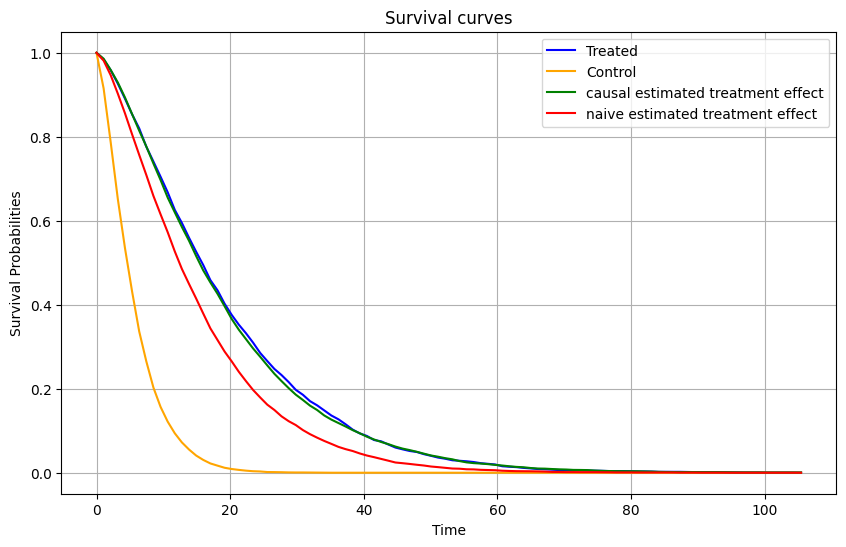

In [ ]:
import numpy as np
from scipy.special import expit
from custom_KM3 import Kaplan_Meier_Estimator
import matplotlib.pyplot as plt

n_samples = 10000
treatment_effect = 2
np.random.seed(1)
X1 = np.random.normal(0.5, 0.1, n_samples)
X2 = 5 * X1 + np.random.normal(0, 0.5, n_samples)

true_shape = 1.5
true_scale = -1 + 5 * X1 + 2 * X2
T = true_scale * np.random.weibull(true_shape, n_samples)

lin_pred = -3 + 3 * X1 + 0.3 * X2
p_treatment = expit(lin_pred)
Treatment = np.random.binomial(1, p_treatment, n_samples)

T_adj = T *(1 + treatment_effect * Treatment)


C = np.random.uniform(X1, 15*X2, n_samples)
Event = (T_adj <= C).astype(int)
Observed_time = np.minimum(T_adj, C)

KM = Kaplan_Meier_Estimator(Observed_time, Event, Treatment)
causal_effect = KM.calculate_causal_effect(np.column_stack((X1, X2)), method="IPTW_IPCW")
naive_effect = KM.calculate_causal_effect(np.column_stack((X1, X2)), method="Estimation")
print(causal_effect)
print(naive_effect)
time_points = np.linspace(0, np.max(T_adj), 100) #np.max(T_adj)
survival_treated = [np.mean(T_adj[Treatment == 1] > t) for t in time_points]
survival_untreated = [np.mean(T_adj[Treatment == 0] > t) for t in time_points]

unique_times_causal_treatment, causal_treatment_survival_probs = KM.IPTW_IPCW_Estimation(1,np.column_stack((X1, X2)))
unique_times_causal_causal, causal_control_survival_probs = KM.IPTW_IPCW_Estimation(0,np.column_stack((X1, X2)))


unique_times_naive_treatment, naive_treatment_survival_probs = KM.Estimation(1)
unique_times_naive_control, naive_control_survival_probs = KM.Estimation(0)

plt.figure(figsize=(10, 6))
plt.plot(time_points, survival_treated, label="Treated", color="blue")
plt.plot(time_points, survival_untreated, label="Control", color="orange")

survival_untreated_to_treated_causal = [np.mean(T_adj[Treatment == 0]*causal_effect > t) for t in time_points]
plt.plot(time_points, survival_untreated_to_treated_causal, label="Causal estimated treatment effect", color="green")

survival_untreated_to_treated_naive = [np.mean(T_adj[Treatment == 0]*naive_effect > t) for t in time_points]
plt.plot(time_points, survival_untreated_to_treated_naive, label="Naive estimated treatment effect", color="red")

plt.title("Survival curves")
plt.xlabel("Time")
plt.ylabel("Survival Probabilities")
plt.legend()
plt.grid()
plt.show()